# Predicción de Series de Tiempo con Redes Neuronales.
En este script vamos a ver cómo se emplea un perceptrón multicapa para hacer predicciones de una serie de tiempo.

In [ ]:
# Cargar las librerias
import numpy as np
import pandas as pd

# Preprocesamiento y métricas
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Tensorflow
import tensorflow as tf
from tensorflow import keras                # Compilar el modelo
from keras.models import Sequential         # Arquitectura del modelo
from keras.layers import Dense              # Arquitectura del modelo
from keras.utils import to_categorical      # Equivalente a OneHotEncoder...

# Graficas
import matplotlib.pyplot as plt

In [ ]:
# Leer los datos
datos=pd.read_csv("pasajeros.csv")
datos.head()
# Los datos representan miles de pasajeros en vuelos internacionales, por mes y año

,Date,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
datos.shape

(144, 2)

([<matplotlib.axis.XTick at 0x7f3dd4a723b0>,
 [Text(0, 0, '1949'),
  Text(12, 0, '1950'),
  Text(24, 0, '1951'),
  Text(36, 0, '1952'),
  Text(48, 0, '1953'),
  Text(60, 0, '1954'),
  Text(72, 0, '1955'),
  Text(84, 0, '1956'),
  Text(96, 0, '1957'),
  Text(108, 0, '1958'),
  Text(120, 0, '1959'),
  Text(132, 0, '1960')])

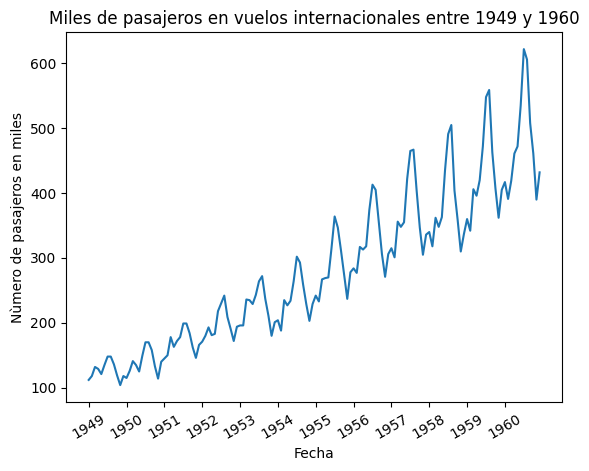

In [ ]:
plt.plot(datos.Date,datos.passengers)
plt.title("Miles de pasajeros en vuelos internacionales entre 1949 y 1960")
plt.xlabel("Fecha")
plt.ylabel("Nùmero de pasajeros en miles")
plt.xticks(np.arange(0,144,12),[1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960],rotation=30)

En la serie de tiempo observamos una tendencia de crecimiento en el valor de la serie con respecto del tiempo. Esta tendencia podemos eliminarlo o no. Para eliminar las tendencias una técnica es la generación de las diferencias de orden $d$. En análisis estadístico de series de tiempo, sí es necesario que la serie sea estacionaria, para la predicción se series de tiempo con redes neuronales no es necesario. Por ahora, no vamos a construir una serie estacionaria.



Vamos a entrenar la red neuronal empleando lo que ya sabemos de regresión. En particular para una serie de tiempo $X(t)$, el modelo que vamos a construir es con un enfoque de modelo autoregresivo, de modo que $$ X(t)=f(X(t-1),X(t-2),...,X(t-r))$$
Donde $f$ es una función, desconocida. ¿Cuánto vale $r$? $r$ es un hiperparámetro que tenemos que calibrar

In [ ]:
# Dada la serie de tiempo y el valor de r el dataframe construye
# el target y los atributos tal y como lo necesitamos en un modelo de Machine Learning
def crear_dataframe(dataset,rezago):
  X,y=[],[]
  for i in range(len(dataset)-rezago):
    a=dataset[i:(i+rezago)]
    X.append(a)
    y.append(dataset[i+rezago])
  return(np.array(X),np.array(y))

In [ ]:
# Paso 1. Preprocesamiento de los datos.

In [ ]:
# En esta parte pueden incluir transformaciones para eliminar las escalas de medicion
# transformaciones MinMaxScaler, StandarScaler

# Asimismo pueden incluir transformaciones para hacer la serie de tiempo Estacionaria.
# No siempre, pero en ocasiones es deseable que la serie sea estacionaria.

In [ ]:
# En Series de Tiempo, siempre va a ser necesario dividir al conjunto de datos
# en entrenamiento y prueba, solo que con la condicion de respetar el orden (temporal)
n_train=119  # Consideramos las primeras 120 (por el comienzo cero) observaciones para entrenar (10 años)... y las restantes para prueba
# 119, es la observación de diciembre de 1958.
train=np.array(datos.passengers[:(n_train+1),]).reshape(-1,1)
test=np.array(datos.passengers[n_train+1:],).reshape(-1,1)

# Crear el dataframe (target y atributo) del conjunto de entrenamiento y del conjunto de prueba
# Nos apoyamos de la función crear_dataframe
# Vamos a emplear 12 rezagos.  // Arbitrario. <- Es el hiperparámetro
r=12  # Tomamos dos obs previas para hacer la predicción dela obs. futura
x_train, y_train=crear_dataframe(train,r)
x_test, y_test=crear_dataframe(test,r)

In [ ]:
x_train, y_train

(array([[[112],
         [118],
         [132],
         ...,
         [119],
         [104],
         [118]],
 
        [[118],
         [132],
         [129],
         ...,
         [104],
         [118],
         [115]],
 
        [[132],
         [129],
         [121],
         ...,
         [118],
         [115],
         [126]],
 
        ...,
 
        [[347],
         [305],
         [336],
         ...,
         [491],
         [505],
         [404]],
 
        [[305],
         [336],
         [340],
         ...,
         [505],
         [404],
         [359]],
 
        [[336],
         [340],
         [318],
         ...,
         [404],
         [359],
         [310]]]),
 array([[115],
        [126],
        [141],
        [135],
        [125],
        [149],
        [170],
        [170],
        [158],
        [133],
        [114],
        [140],
        [145],
        [150],
        [178],
        [163],
        [172],
        [178],
        [199],
        [199],
       

In [ ]:
                        # Paso 2. Definir la arquitectura de la red
modelo=Sequential()
modelo.add(Dense(units=12,input_dim=r,activation="relu"))  # 1er capa oculta
modelo.add(Dense(units=1))   # Capa salida
modelo.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 169 (676.00 B)

 Trainable params: 169 (676.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Paso 3. Compilar el modelo
modelo.compile(loss="mean_squared_error", optimizer="Adam",metrics=["mean_absolute_error"])


In [ ]:
# Paso 4. Entrenar el modelo
historial=modelo.fit(x_train,y_train,epochs=250,batch_size=16,validation_data=(x_test,y_test))

Epoch 1/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 88977.9531 - mean_absolute_error: 281.7349 - val_loss: 249232.6406 - val_mean_absolute_error: 492.8681
Epoch 2/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 79144.4844 - mean_absolute_error: 265.1625 - val_loss: 210984.2031 - val_mean_absolute_error: 452.8793
Epoch 3/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 66320.4531 - mean_absolute_error: 243.8773 - val_loss: 173655.3438 - val_mean_absolute_error: 409.9395
Epoch 4/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 56075.5195 - mean_absolute_error: 224.4033 - val_loss: 134167.9844 - val_mean_absolute_error: 359.3661
Epoch 5/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 37268.8242 - mean_absolute_error: 181.5200 - val_loss: 97324.1641 - val_mean_absolute_error: 304.2399
Epoch 6/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 32188.4492 - mean_absolute_error: 166.6014 - val_loss: 64935.4375 - val_mean_absolute_error: 245.8948
Epoch 7/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 

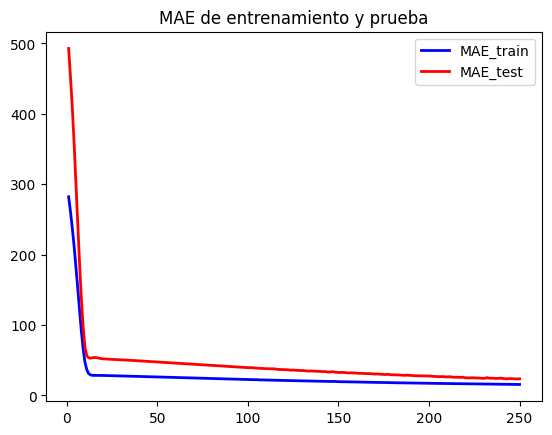

In [ ]:
# Análisis gráfico del modelo
# GRaficar al función de pérdida.

MAE=historial.history["mean_absolute_error"]
val_MAE=historial.history["val_mean_absolute_error"]
loss=historial.history["loss"]
val_loss=historial.history["val_loss"]
epocas=range(1,len(MAE)+1)

plt.plot(epocas, MAE, color='blue', lw=2.0, label='MAE_train')
plt.plot(epocas, val_MAE, color='red', lw=2.0, label='MAE_test')
plt.title("MAE de entrenamiento y prueba")
plt.legend()

In [ ]:
# Con el modelo ajustado, podemos hacer predicciones
y_pred=modelo.predict(x_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[403.43536],
       [429.77866],
       [472.3883 ],
       [457.78577],
       [490.0135 ],
       [534.38965],
       [555.97906],
       [592.9872 ],
       [538.2545 ],
       [428.79492],
       [386.5013 ],
       [420.29633]], dtype=float32)

In [ ]:
y_test

array([[417],
       [391],
       [419],
       [461],
       [472],
       [535],
       [622],
       [606],
       [508],
       [461],
       [390],
       [432]])

In [ ]:
# El error absoluto promedio del modelo ajustado
# Devuelve: Loss_validation, Metrica_validacion
modelo.evaluate(x_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 958.5918 - mean_absolute_error: 23.6888


[958.591796875, 23.68878173828125]

In [ ]:
modelo.predict(x_train).shape

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


(108, 1)

In [ ]:
# DataFRames de predicciones
datos["pasajeros_train"]=np.nan
datos.loc[r:len(x_train)+r-1,"pasajeros_train"]=modelo.predict(x_train)
datos["pasajeros_test"]=np.nan
datos.loc[n_train+r+1:,"pasajeros_test"]=modelo.predict(x_test)
datos

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


,Date,passengers,pasajeros_train,pasajeros_test
0,1949-01,112,NaN,NaN
1,1949-02,118,NaN,NaN
2,1949-03,132,NaN,NaN
3,1949-04,129,NaN,NaN
4,1949-05,121,NaN,NaN
...,...,...,...,...
139,1960-08,606,NaN,592.987183
140,1960-09,508,NaN,538.254517
141,1960-10,461,NaN,428.794922
142,1960-11,390,NaN,386.501312


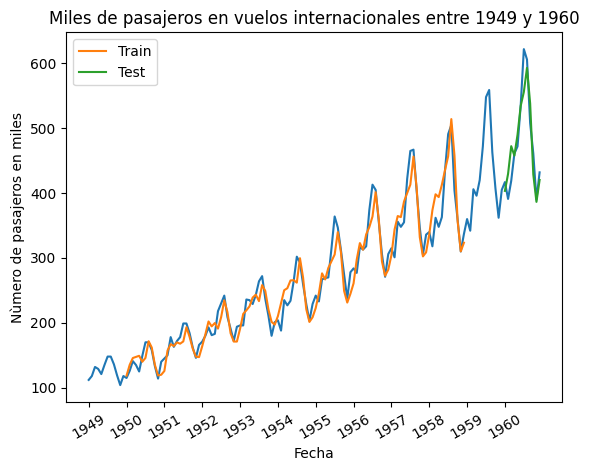

In [ ]:
# Gráficas
plt.plot(datos.Date,datos.passengers)
plt.plot(datos.Date,datos.pasajeros_train,label="Train")
plt.plot(datos.Date,datos.pasajeros_test,label="Test")
plt.title("Miles de pasajeros en vuelos internacionales entre 1949 y 1960")
plt.xlabel("Fecha")
plt.ylabel("Nùmero de pasajeros en miles")
plt.xticks(np.arange(0,144,12),[1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960],rotation=30)
plt.legend()

# Predicciones
Definimos cuántas observaciones futuras deseamos
en este caso n_obs=6


In [ ]:
#Vector de predicciones
prediccion=datos.passengers  # Aquí vamos a apilar las predicciones
prediccion

,passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [ ]:
n_obs=12
for i in range(n_obs):
  n_inicial=len(datos)-r+i
  n_final=n_inicial+r
  x_nuevo=np.array(prediccion[n_inicial:n_final]).reshape(-1,1)
  y_pred=modelo.predict(np.array([x_nuevo]))
  prediccion[n_final]=y_pred[0][0]
prediccion.tail(n_obs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


<ipython-input-230-9c151204c8d4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediccion[n_final]=y_pred[0][0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


,passengers
144,439.959076
145,467.494629
146,530.901123
147,554.947510
148,581.048828
149,610.996643
150,624.776062
151,608.445801
152,544.606445
153,494.015869
